# Table of Contents

## 1. Importing libraries and data and renaming columns  
## 2. The elbow technique  
## 3. k-means clustering  

## 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create a Path variable
path=r'C:\Users\sands\Documents\03-2023 Airbnb New York'

# Read the Airbnb Listings CSV file
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data','Airbnb_cleaned.csv'))

In [4]:
df.shape

(41533, 18)

In [5]:
df.head()

,Unnamed: 0,Id,Listing Name,Host Id,Host Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Listing Type,Price,Minimum Nights,Total Reviews,Last Review Date,Reviews per Month,Host Listings Count,Future Availability,Reviews in Last 12 Months
0,0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1
1,1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0
2,2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0
3,3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,2022-11-20,3.38,1,79,50
4,4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,2022-06-21,0.31,3,365,1


In [9]:
# Drop the Columns not required for the Regression Analysis
df.drop(['Unnamed: 0','Id','Listing Name','Host Name','Host Id','Latitude','Longitude','Neighbourhood','Total Reviews','Reviews per Month','Last Review Date','Reviews in Last 12 Months'], axis=1, inplace=True)
# Check the df after the changes
df.head(5)

,Neighbourhood Group,Listing Type,Price,Minimum Nights,Host Listings Count,Future Availability
0,Brooklyn,Entire home/apt,275,21,1,267
1,Manhattan,Private room,75,2,1,0
2,Brooklyn,Private room,60,30,2,322
3,Manhattan,Private room,68,2,1,79
4,Manhattan,Entire home/apt,175,30,3,365


In [12]:
#Encode the input Variables Neighbourhood and Listing Type as the Model only accepts Numeric Data Type
def Encode(df):
    for column in df.columns[df.columns.isin(['Neighbourhood Group', 'Listing Type'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())

In [13]:
df_en.head()

,Neighbourhood Group,Listing Type,Price,Minimum Nights,Host Listings Count,Future Availability
0,0,0,275,21,1,267
1,1,1,75,2,1,0
2,0,1,60,30,2,322
3,1,1,68,2,1,79
4,1,0,175,30,3,365


## 2. The elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(df_en).score(df_en) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

score

[-36215414028.97508,
 -8554334543.9939995,
 -4987362532.575128,
 -3649846002.5977707,
 -2863876104.93345,
 -2160690710.1667557,
 -1476279576.5843034,
 -1190683301.4232578,
 -1013093910.8479729]

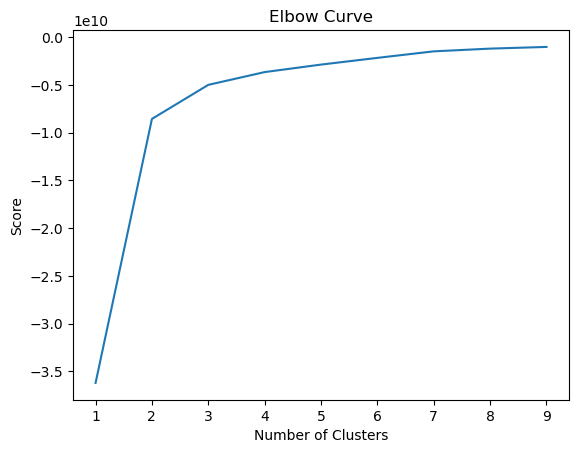

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 3. k-means clustering

**Question 4: Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
Explain why you chose that number in a markdown cell.**
>>**Answer** In the plot above it can be seen that the value increases sharply between 2 and 3 and the kind of flatens. So the breaking point is 3 that's why I chose 3 as the number of clusters. 

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [23]:
# Fit the k-means object to the data.

kmeans.fit(df_en)

KMeans(n_clusters=3)

In [24]:
df_en['clusters'] = kmeans.fit_predict(df_en)

In [26]:
df_en.head()

,Neighbourhood Group,Listing Type,Price,Minimum Nights,Host Listings Count,Future Availability,clusters
0,0,0,275,21,1,267,2
1,1,1,75,2,1,0,2
2,0,1,60,30,2,322,2
3,1,1,68,2,1,79,2
4,1,0,175,30,3,365,2


In [27]:
df_en['clusters'].value_counts()

2    41106
0      423
1        4
Name: clusters, dtype: int64

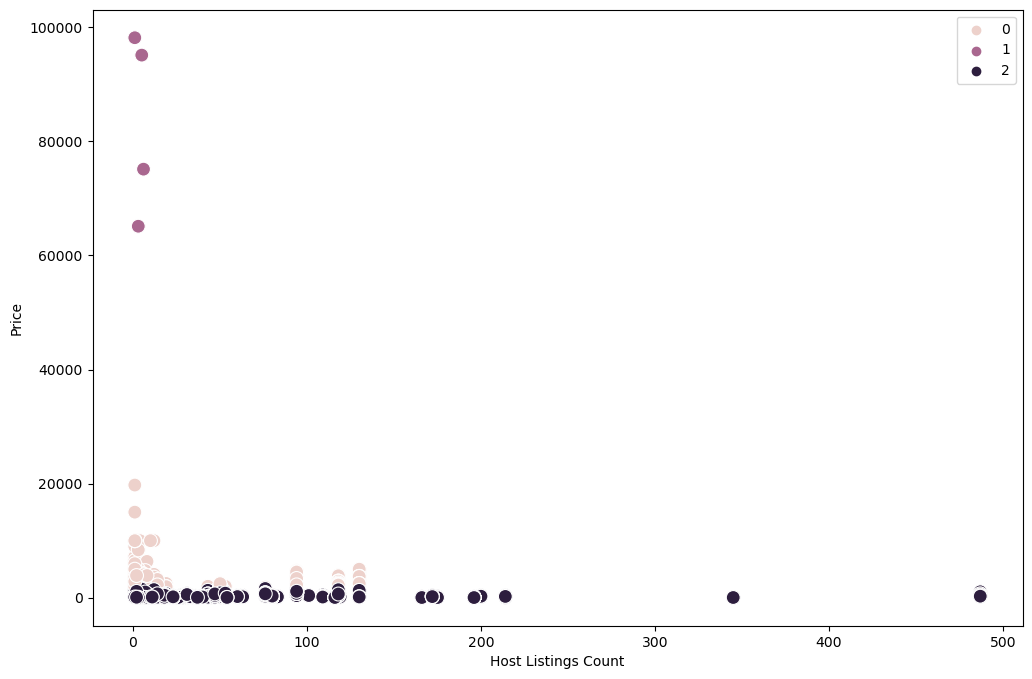

In [37]:
# Plot the clusters for the "Price per Unit" and "Host Listings Count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_en['Host Listings Count'], y=df['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Host Listings Count') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

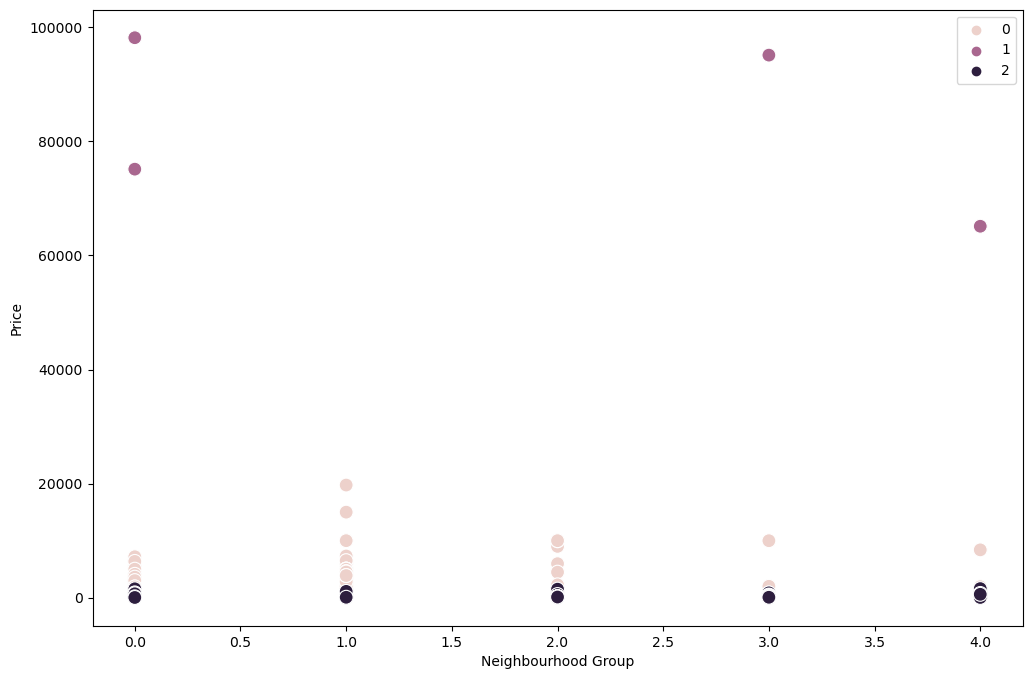

In [38]:
# Plot the clusters for the "Price per Unit" and "Neighbourhood Group" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_en['Neighbourhood Group'], y=df['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Neighbourhood Group') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

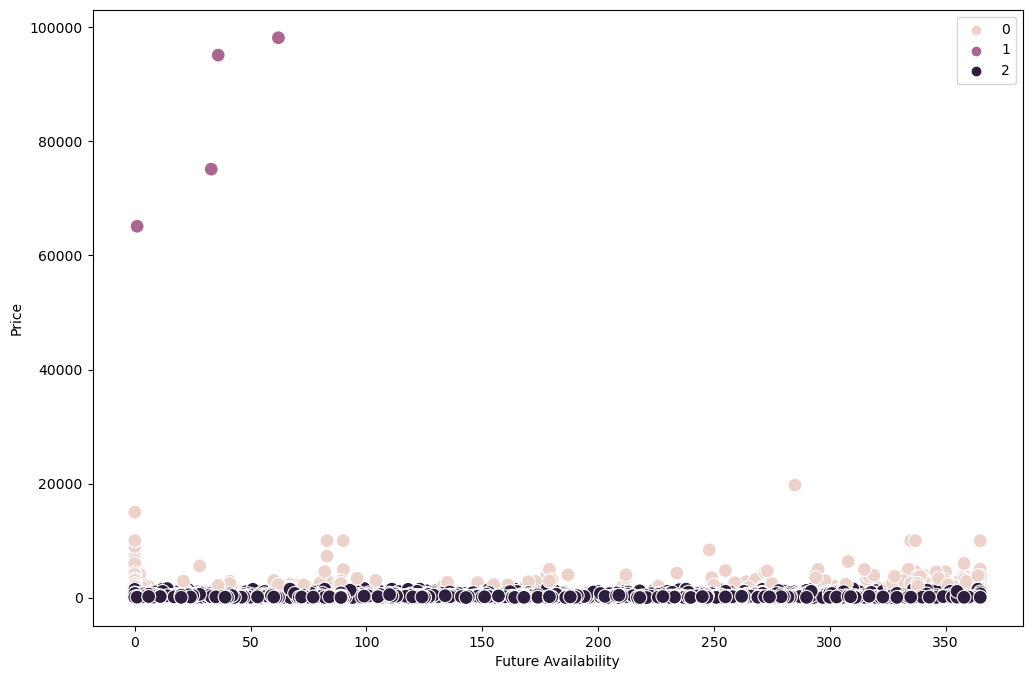

In [40]:
# Plot the clusters for the "Future Availability" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_en['Future Availability'], y=df['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Future Availability') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

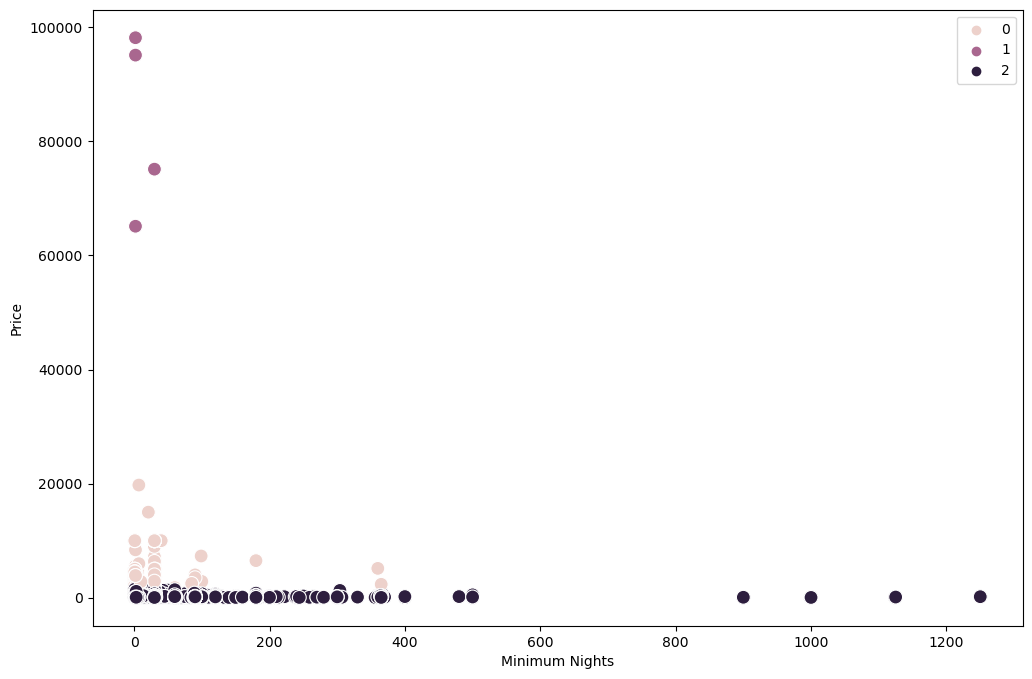

In [39]:
# Plot the clusters for the "Price per Unit" and "Minimum Nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_en['Minimum Nights'], y=df['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Minimum Nights') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

**Question 8: Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.**
>>**Answer** I explored the relationships between Price and Host Listing Count/Neighbourhood Group/Minimum Nights/Future Availability to see if there are any variant clusters

In [34]:
df_en.loc[df_en['clusters'] == 2, 'cluster'] = 'dark purple'
df_en.loc[df_en['clusters'] == 1, 'cluster'] = 'purple'
df_en.loc[df_en['clusters'] == 0, 'cluster'] = 'pink'

In [35]:
df_en.groupby('cluster').agg({'Minimum Nights':['mean', 'median'], 
                         'Host Listings Count':['mean', 'median'], 
                         'Future Availability':['mean', 'median'],
                          'Price':['mean', 'median']})

Minimum Nights        Host Listings Count         \
                      mean median                mean median   
cluster                                                        
dark purple      18.678952   10.0           20.345619    1.0   
pink             10.252955    1.0           48.111111   11.0   
purple            9.000000    2.0            3.750000    4.0   

            Future Availability                Price           
                           mean median          mean   median  
cluster                                                        
dark purple          142.420596   86.0    184.253686    130.0  
pink                 228.600473  326.0   3101.626478   2400.0  
purple                33.000000   34.5  83376.000000  85115.0

**Question 10: Propose what these results could be useful for in future steps of an analytics pipeline.**
>>**Answer** The Airbnb data has useful insights which aren't typically fitting into the cluster analysis but it can be seen that there are neighborhood listing densities and areas which are more popular than others.  For the data exploration purposes, it also would be nice to have some additional features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided.